In [4]:
#%pip install -U scikit-learn
#%pip install seaborn

In [5]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
df= pd.read_csv("diamonds.csv")
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [7]:
valores_nulos=df.isnull().sum()
valores_nulos

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

In [8]:
df['carat'] = df['carat'].fillna(method="ffill")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,NaN,58.0,2757.0,6.15,6.12,3.74


In [9]:
#Realizamos una copia del dataframe
df1=df.copy()

#Sustituir valores nulos con promedio o media
df1["depth"]=df1["depth"].fillna(round(df["depth"].mean(),1))
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.7,58.0,2757.0,6.15,6.12,3.74


In [10]:
#Realizamos una copia del dataframe
df2=df1.copy()

#Sustituir valores nulos con mediana
df2["table"]=df2["table"].fillna(round(df1["table"].median(),1))
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.7,58.0,2757.0,6.15,6.12,3.74


In [11]:
df2['price'] = df2['price'].fillna(method="bfill")
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.7,58.0,2757.0,6.15,6.12,3.74


In [12]:
#Realizamos una copia del dataframe
df3=df2.copy()

#Sustituir valores nulos con mediana
df3["x"]=df3["x"].fillna(round(df2["x"].median(),1))
df3

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.7,58.0,2757.0,6.15,6.12,3.74


In [13]:
#Realizamos una copia del dataframe
df4=df3.copy()

#Sustituir valores nulos con promedio o media
df4["y"]=df4["y"].fillna(round(df3["y"].mean(),1))
df4

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.7,58.0,2757.0,6.15,6.12,3.74


In [14]:
df4['z'] = df['z'].fillna(method="ffill")
df4

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.7,58.0,2757.0,6.15,6.12,3.74


In [15]:
valores_nulos=df4.isnull().sum()
valores_nulos

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [16]:
df4.to_csv("diamonds_sinNULOS.csv")

In [17]:
DATA = pd.read_csv("diamonds_sinNULOS.csv")
DATA

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53938,0.86,Premium,H,SI2,61.7,58.0,2757.0,6.15,6.12,3.74


<Figure size 1080x576 with 0 Axes>

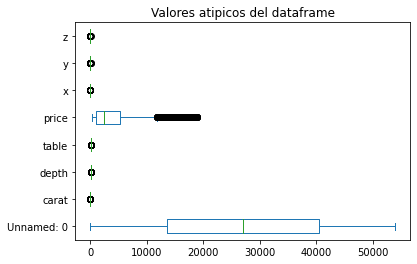

In [18]:
#Diagrama de caja y bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
DATA.plot(kind='box', vert=False)
plt.title("Valores atipicos del dataframe")
plt.show() #Se dibuja el diagrama

In [19]:
#Metodo aplicando desviacion estandar. Encuentro valores extremos
y=DATA
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print('Limite Superior Permitido', Limite_Superior)
print('Limite Inferior Permitido', Limite_Inferior)

/var/folders/q1/f43_jg2540b1tkfdg5w6_rgc0000gn/T/ipykernel_97217/1661175522.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Limite_Superior= y.mean() + 3*y.std()


Limite Superior Permitido Unnamed: 0    73683.343291
carat             2.220013
depth            66.047217
table            64.160540
price         15901.118931
x                 9.096441
y                 9.160929
z                 5.655821
dtype: float64
Limite Inferior Permitido Unnamed: 0   -19744.343291
carat            -0.624106
depth            57.451571
table            50.753939
price         -8035.519450
x                 2.365894
y                 2.308121
z                 1.421640
dtype: float64


/var/folders/q1/f43_jg2540b1tkfdg5w6_rgc0000gn/T/ipykernel_97217/1661175522.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Limite_Inferior= y.mean() - 3*y.std()


In [20]:
#Encontramos outliers del dataframe
outliers = DATA[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

/var/folders/q1/f43_jg2540b1tkfdg5w6_rgc0000gn/T/ipykernel_97217/2175595467.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = DATA[(y>Limite_Superior)|(y<Limite_Inferior)]


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,56.9,65.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
53935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Obtenemos datos sin outliers del dataframe
DATA1=DATA[(y<=Limite_Superior)&(y>=Limite_Inferior)]
DATA1

/var/folders/q1/f43_jg2540b1tkfdg5w6_rgc0000gn/T/ipykernel_97217/3849735462.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  DATA1=DATA[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,NaN,NaN,NaN,61.5,55.0,326.0,3.95,3.98,2.43
1,1,0.21,NaN,NaN,NaN,59.8,61.0,326.0,3.89,3.84,2.31
2,2,0.23,NaN,NaN,NaN,NaN,NaN,327.0,4.05,4.07,2.31
3,3,0.29,NaN,NaN,NaN,62.4,58.0,334.0,4.20,4.23,2.63
4,4,0.31,NaN,NaN,NaN,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,NaN,NaN,NaN,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53936,0.72,NaN,NaN,NaN,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53937,0.70,NaN,NaN,NaN,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53938,0.86,NaN,NaN,NaN,61.7,58.0,2757.0,6.15,6.12,3.74


In [22]:
#Eliminamos columnas innecesarias
DATA2=DATA1.drop(['Unnamed: 0', 'cut', 'color', 'clarity'], axis=1)
DATA2

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,NaN,NaN,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [23]:
#Reemplazamos valores atipicos del dataframe con mean
#Realizamos copia del dataframe
data_clean=DATA2.copy()
data_clean=data_clean.fillna(round(DATA2.mean(),1))
data_clean

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.7,58.0,2757.0,6.15,6.12,3.74


In [24]:
#Corroboramos valores nulos del dataframe limpio
valores_nulos=data_clean.isnull().sum()
valores_nulos

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [25]:
data_clean.to_csv("diamonds_sinOUTLIERS.csv")

In [26]:
df= pd.read_csv("diamonds_sinOUTLIERS.csv")
df.head(5)

,Unnamed: 0,carat,depth,table,price,x,y,z
0,0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,2,0.23,61.7,57.4,327.0,4.05,4.07,2.31
3,3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,4,0.31,63.3,58.0,335.0,4.34,4.35,2.75


In [27]:
#Definimos la función del modelo de predicción

model=smf.ols(formula="price~carat", data=df).fit()
model.params

Intercept   -1485.00251
carat        6511.79246
dtype: float64

<AxesSubplot:xlabel='carat', ylabel='price'>

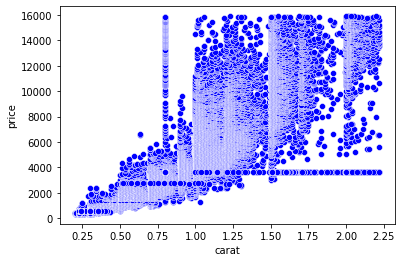

In [28]:
sns.scatterplot(x='carat', y='price', color="blue", data=df)

In [29]:
#Calculamos el coeficiente de Determinación R cuadrado
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 1.420e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:59:06   Log-Likelihood:            -4.8098e+05
No. Observations:               53940   AIC:                         9.620e+05
Df Residuals:                   53938   BIC:                         9.620e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1485.0025     15.635    -94.981      0.000   -1515.647   -1454.358
carat       6511.7925     17.281    376.808      0.000    6477.921    6545.664
==============================================================================
Omnibus:                     9683.267   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           227074.655
Skew:                           0.182   Prob(JB):                         0.00
Kurtosis:                      13.045   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.725)
coef_Correl

0.85146931829632

In [31]:
#Definimos la función del modelo de predicción

model1=smf.ols(formula="price~depth", data=df).fit()
model1.params

Intercept    4014.327636
depth          -6.264672
dtype: float64

<AxesSubplot:xlabel='depth', ylabel='price'>

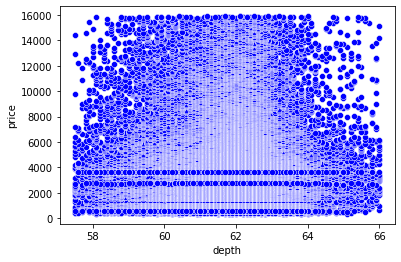

In [32]:
sns.scatterplot(x='depth', y='price', color="blue", data=df)
#sns.scatterplot(x='speeding', y='total', color="red", data=df)

In [33]:
#Calculamos el coeficiente de Determinación R cuadrado
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2905
Date:                Mon, 26 Sep 2022   Prob (F-statistic):              0.590
Time:                        14:59:06   Log-Likelihood:            -5.1576e+05
No. Observations:               53940   AIC:                         1.032e+06
Df Residuals:                   53938   BIC:                         1.032e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4014.3276    717.838      5.592      0.000    2607.360    5421.295
depth         -6.2647     11.624     -0.539      0.590     -29.048      16.518
==============================================================================
Omnibus:                    12949.773   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25612.177
Skew:                           1.471   Prob(JB):                         0.00
Kurtosis:                       4.657   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.000)
coef_Correl

0.0

In [35]:
#Definimos la función del modelo de predicción

model2=smf.ols(formula="price~table", data=df).fit()
model2.params

Intercept   -8326.499168
table         208.242130
dtype: float64

<AxesSubplot:xlabel='table', ylabel='price'>

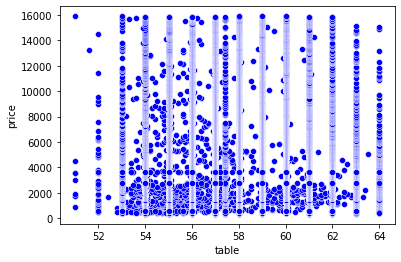

In [36]:
sns.scatterplot(x='table', y='price', color="blue", data=df)

In [37]:
#Calculamos el coeficiente de Determinación R cuadrado
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     899.3
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          5.77e-196
Time:                        14:59:07   Log-Likelihood:            -5.1532e+05
No. Observations:               53940   AIC:                         1.031e+06
Df Residuals:                   53938   BIC:                         1.031e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8326.4992    398.897    -20.874      0.000   -9108.341   -7544.658
table        208.2421      6.944     29.988      0.000     194.631     221.853
==============================================================================
Omnibus:                    13112.707   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26299.503
Skew:                           1.478   Prob(JB):                         0.00
Kurtosis:                       4.723   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.016)
coef_Correl

0.12649110640673517

In [39]:
#Definimos la función del modelo de predicción

model3=smf.ols(formula="price~carat+depth", data=df).fit()
model3.params

Intercept     492.162739
carat        6512.810225
depth         -32.036176
dtype: float64

<AxesSubplot:xlabel='carat', ylabel='price'>

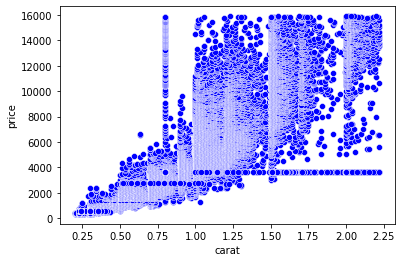

In [40]:
sns.scatterplot(x='carat', y='price', color="blue", data=df)

<AxesSubplot:xlabel='depth', ylabel='price'>

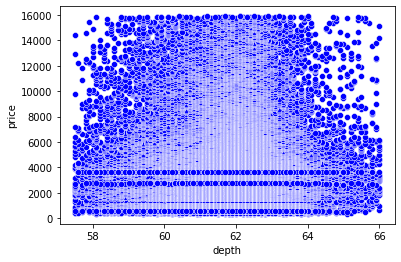

In [41]:
sns.scatterplot(x='depth', y='price', color="blue", data=df)

In [42]:
#Calculamos el coeficiente de Determinación R cuadrado
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                 7.104e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:59:08   Log-Likelihood:            -4.8096e+05
No. Observations:               53940   AIC:                         9.619e+05
Df Residuals:                   53937   BIC:                         9.620e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.1627    376.668      1.307      0.191    -246.110    1230.436
carat       6512.8102     17.278    376.937      0.000    6478.945    6546.676
depth        -32.0362      6.098     -5.254      0.000     -43.988     -20.084
==============================================================================
Omnibus:                     9685.711   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           228923.203
Skew:                           0.176   Prob(JB):                         0.00
Kurtosis:                      13.086   Cond. No.                     3.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.725)
coef_Correl

0.85146931829632

In [44]:
#Definimos la función del modelo de predicción

model4=smf.ols(formula="price~carat+table", data=df).fit()
model4.params

Intercept    1338.838208
carat        6555.154405
table         -49.785032
dtype: float64

<AxesSubplot:xlabel='carat', ylabel='price'>

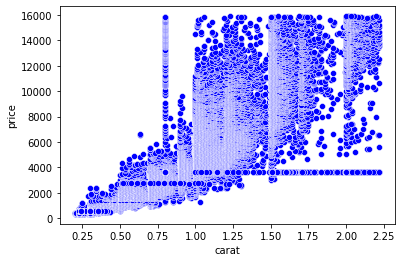

In [45]:
sns.scatterplot(x='carat', y='price', color="blue", data=df)

<AxesSubplot:xlabel='table', ylabel='price'>

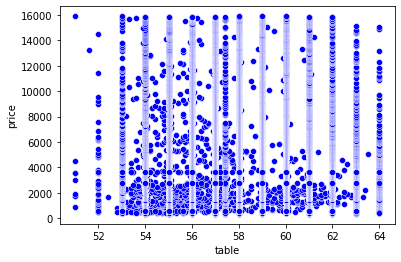

In [46]:
sns.scatterplot(x='table', y='price', color="blue", data=df)

In [47]:
#Calculamos el coeficiente de Determinación R cuadrado
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                 7.131e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:59:08   Log-Likelihood:            -4.8089e+05
No. Observations:               53940   AIC:                         9.618e+05
Df Residuals:                   53937   BIC:                         9.618e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1338.8382    212.275      6.307      0.000     922.777    1754.899
carat       6555.1544     17.557    373.370      0.000    6520.743    6589.566
table        -49.7850      3.732    -13.339      0.000     -57.100     -42.470
==============================================================================
Omnibus:                     9701.399   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232896.552
Skew:                           0.166   Prob(JB):                         0.00
Kurtosis:                      13.174   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.726)
coef_Correl

0.8520563361656317

In [49]:
#Definimos la función del modelo de predicción

model5=smf.ols(formula="price~depth+table", data=df).fit()
model5.params

Intercept   -15241.268762
depth           96.952682
table          224.421302
dtype: float64

<AxesSubplot:xlabel='depth', ylabel='price'>

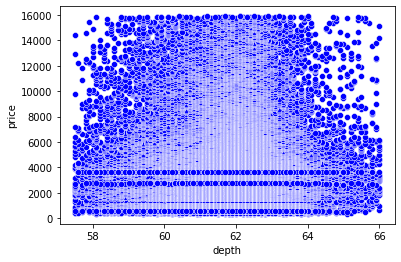

In [50]:
sns.scatterplot(x='depth', y='price', color="blue", data=df)

<AxesSubplot:xlabel='table', ylabel='price'>

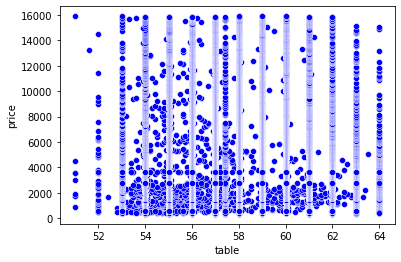

In [51]:
sns.scatterplot(x='table', y='price', color="blue", data=df)

In [52]:
#Calculamos el coeficiente de Determinación R cuadrado
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     482.9
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          1.41e-208
Time:                        14:59:09   Log-Likelihood:            -5.1528e+05
No. Observations:               53940   AIC:                         1.031e+06
Df Residuals:                   53937   BIC:                         1.031e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.524e+04    943.552    -16.153      0.000   -1.71e+04   -1.34e+04
depth         96.9527     11.991      8.086      0.000      73.451     120.455
table        224.4213      7.223     31.071      0.000     210.265     238.578
==============================================================================
Omnibus:                    13165.871   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26490.348
Skew:                           1.481   Prob(JB):                         0.00
Kurtosis:                       4.734   Cond. No.                     5.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.018)
coef_Correl

0.1341640786499874

In [54]:
#Definimos la función del modelo de predicción

model6=smf.ols(formula="price~x+y+z", data=df).fit()
model6.params

Intercept   -11408.675253
x              -49.602074
y             1920.542829
z             1218.701872
dtype: float64

<AxesSubplot:xlabel='x', ylabel='price'>

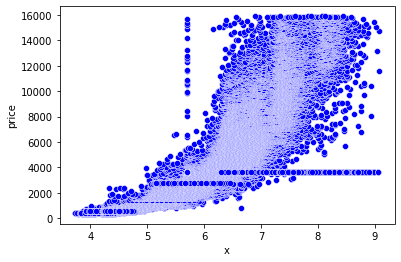

In [55]:
sns.scatterplot(x='x', y='price', color="blue", data=df)

<AxesSubplot:xlabel='y', ylabel='price'>

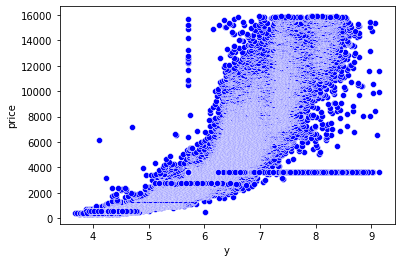

In [56]:
sns.scatterplot(x='y', y='price', color="blue", data=df)

<AxesSubplot:xlabel='z', ylabel='price'>

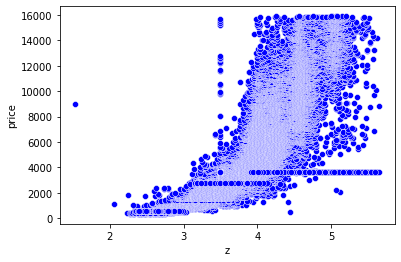

In [57]:
sns.scatterplot(x='z', y='price', color="blue", data=df)

In [58]:
#Calculamos el coeficiente de Determinación R cuadrado
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                 4.491e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:59:10   Log-Likelihood:            -4.8199e+05
No. Observations:               53940   AIC:                         9.640e+05
Df Residuals:                   53936   BIC:                         9.640e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.141e+04     41.843   -272.651      0.000   -1.15e+04   -1.13e+04
x            -49.6021    109.653     -0.452      0.651    -264.523     165.319
y           1920.5428    108.120     17.763      0.000    1708.627    2132.459
z           1218.7019     79.459     15.338      0.000    1062.962    1374.442
==============================================================================
Omnibus:                     7078.833   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50695.387
Skew:                           0.422   Prob(JB):                         0.00
Kurtosis:                       7.674   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.714)
coef_Correl

0.8449852069711044

In [60]:
#Definimos la función del modelo de predicción

model7=smf.ols(formula="price~x+y+z+carat+depth", data=df).fit()
model7.params

Intercept   -5325.380492
x            -931.303855
y            1833.510902
z             278.591155
carat        3991.746973
depth          -5.515032
dtype: float64

<AxesSubplot:xlabel='x', ylabel='price'>

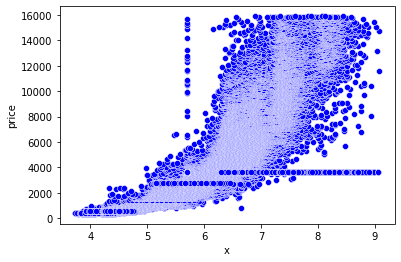

In [61]:
sns.scatterplot(x='x', y='price', color="blue", data=df)

<AxesSubplot:xlabel='y', ylabel='price'>

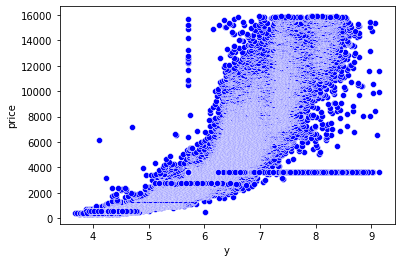

In [62]:
sns.scatterplot(x='y', y='price', color="blue", data=df)

<AxesSubplot:xlabel='z', ylabel='price'>

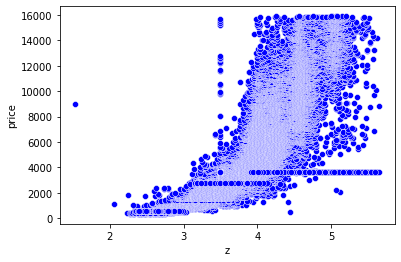

In [63]:
sns.scatterplot(x='z', y='price', color="blue", data=df)

<AxesSubplot:xlabel='carat', ylabel='price'>

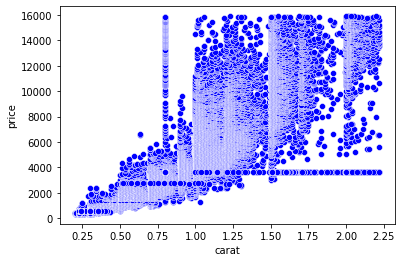

In [64]:
sns.scatterplot(x='carat', y='price', color="blue", data=df)

<AxesSubplot:xlabel='depth', ylabel='price'>

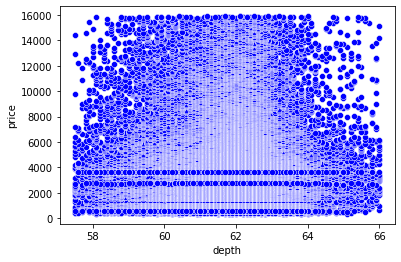

In [65]:
sns.scatterplot(x='depth', y='price', color="blue", data=df)

In [66]:
#Calculamos el coeficiente de Determinación R cuadrado
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                 2.998e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:59:12   Log-Likelihood:            -4.7991e+05
No. Observations:               53940   AIC:                         9.598e+05
Df Residuals:                   53934   BIC:                         9.599e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5325.3805    559.888     -9.512      0.000   -6422.766   -4227.995
x           -931.3039    109.720     -8.488      0.000   -1146.357    -716.251
y           1833.5109    107.024     17.132      0.000    1623.742    2043.279
z            278.5912    114.922      2.424      0.015      53.343     503.839
carat       3991.7470     60.614     65.855      0.000    3872.943    4110.551
depth         -5.5150      8.926     -0.618      0.537     -23.009      11.979
==============================================================================
Omnibus:                     7763.939   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113786.284
Skew:                           0.135   Prob(JB):                         0.00
Kurtosis:                      10.110   Cond. No.                     4.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.735)
coef_Correl

0.8573214099741123

In [68]:
#Definimos la función del modelo de predicción

model8=smf.ols(formula="price~x+y+z+carat+depth+table", data=df).fit()
model8.params

Intercept    -583.271374
x            -771.581798
y            1717.455210
z             215.575650
carat        4029.737664
depth         -28.929689
table         -58.414030
dtype: float64

<AxesSubplot:xlabel='x', ylabel='price'>

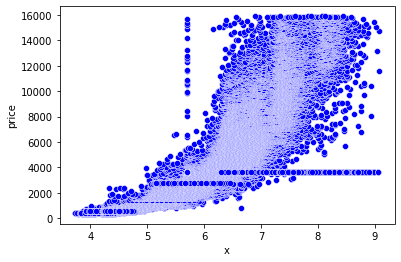

In [69]:
sns.scatterplot(x='x', y='price', color="blue", data=df)

<AxesSubplot:xlabel='y', ylabel='price'>

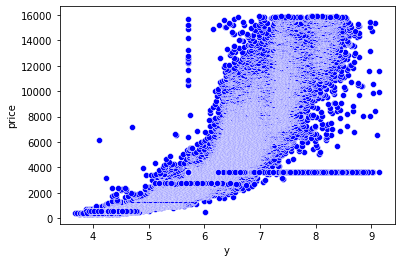

In [70]:
sns.scatterplot(x='y', y='price', color="blue", data=df)

<AxesSubplot:xlabel='z', ylabel='price'>

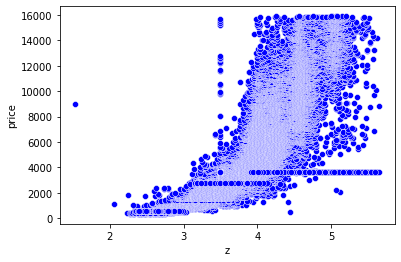

In [71]:
sns.scatterplot(x='z', y='price', color="blue", data=df)

<AxesSubplot:xlabel='carat', ylabel='price'>

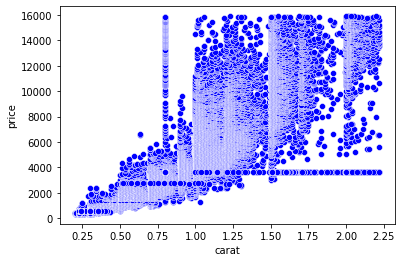

In [72]:
sns.scatterplot(x='carat', y='price', color="blue", data=df)

<AxesSubplot:xlabel='depth', ylabel='price'>

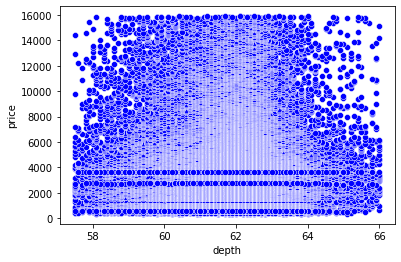

In [73]:
sns.scatterplot(x='depth', y='price', color="blue", data=df)

<AxesSubplot:xlabel='table', ylabel='price'>

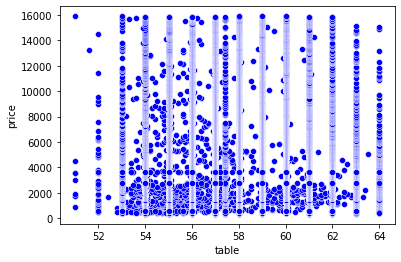

In [74]:
sns.scatterplot(x='table', y='price', color="blue", data=df)

In [75]:
#Calculamos el coeficiente de Determinación R cuadrado
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 2.513e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:59:14   Log-Likelihood:            -4.7979e+05
No. Observations:               53940   AIC:                         9.596e+05
Df Residuals:                   53933   BIC:                         9.597e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -583.2714    639.457     -0.912      0.362   -1836.611     670.069
x           -771.5818    109.986     -7.015      0.000    -987.155    -556.008
y           1717.4552    107.066     16.041      0.000    1507.604    1927.306
z            215.5757    114.751      1.879      0.060      -9.337     440.488
carat       4029.7377     60.536     66.568      0.000    3911.088    4148.388
depth        -28.9297      9.038     -3.201      0.001     -46.644     -11.215
table        -58.4140      3.832    -15.244      0.000     -65.925     -50.903
==============================================================================
Omnibus:                     7783.308   Durbin-Watson:                   0.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117055.063
Skew:                           0.110   Prob(JB):                         0.00
Kurtosis:                      10.213   Cond. No.                     7.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
#Calculamos el coeficiente de correlación R 
coef_Correl= np.sqrt(0.737)
coef_Correl

0.8584870412533901

In [80]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df.corr()
Corr_Factors

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.396319,-0.036129,-0.108361,-0.356708,-0.407460,-0.408163,-0.410421
carat,-0.396319,1.000000,0.011212,0.185160,0.851292,0.958468,0.957180,0.956364
depth,-0.036129,0.011212,1.000000,-0.277040,-0.002321,-0.031844,-0.033726,0.074943
table,-0.108361,0.185160,-0.277040,1.000000,0.128059,0.195963,0.190792,0.159834
price,-0.356708,0.851292,-0.002321,0.128059,1.000000,0.842959,0.844281,0.840173
x,-0.407460,0.958468,-0.031844,0.195963,0.842959,1.000000,0.997742,0.989129
y,-0.408163,0.957180,-0.033726,0.190792,0.844281,0.997742,1.000000,0.988672
z,-0.410421,0.956364,0.074943,0.159834,0.840173,0.989129,0.988672,1.000000


In [82]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,0.396319,0.036129,0.108361,0.356708,0.407460,0.408163,0.410421
carat,0.396319,1.000000,0.011212,0.185160,0.851292,0.958468,0.957180,0.956364
depth,0.036129,0.011212,1.000000,0.277040,0.002321,0.031844,0.033726,0.074943
table,0.108361,0.185160,0.277040,1.000000,0.128059,0.195963,0.190792,0.159834
price,0.356708,0.851292,0.002321,0.128059,1.000000,0.842959,0.844281,0.840173
x,0.407460,0.958468,0.031844,0.195963,0.842959,1.000000,0.997742,0.989129
y,0.408163,0.957180,0.033726,0.190792,0.844281,0.997742,1.000000,0.988672
z,0.410421,0.956364,0.074943,0.159834,0.840173,0.989129,0.988672,1.000000


<AxesSubplot:>

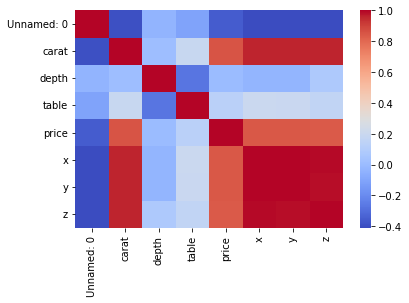

In [83]:
 #Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors, cmap = 'coolwarm')  
Heat_Map

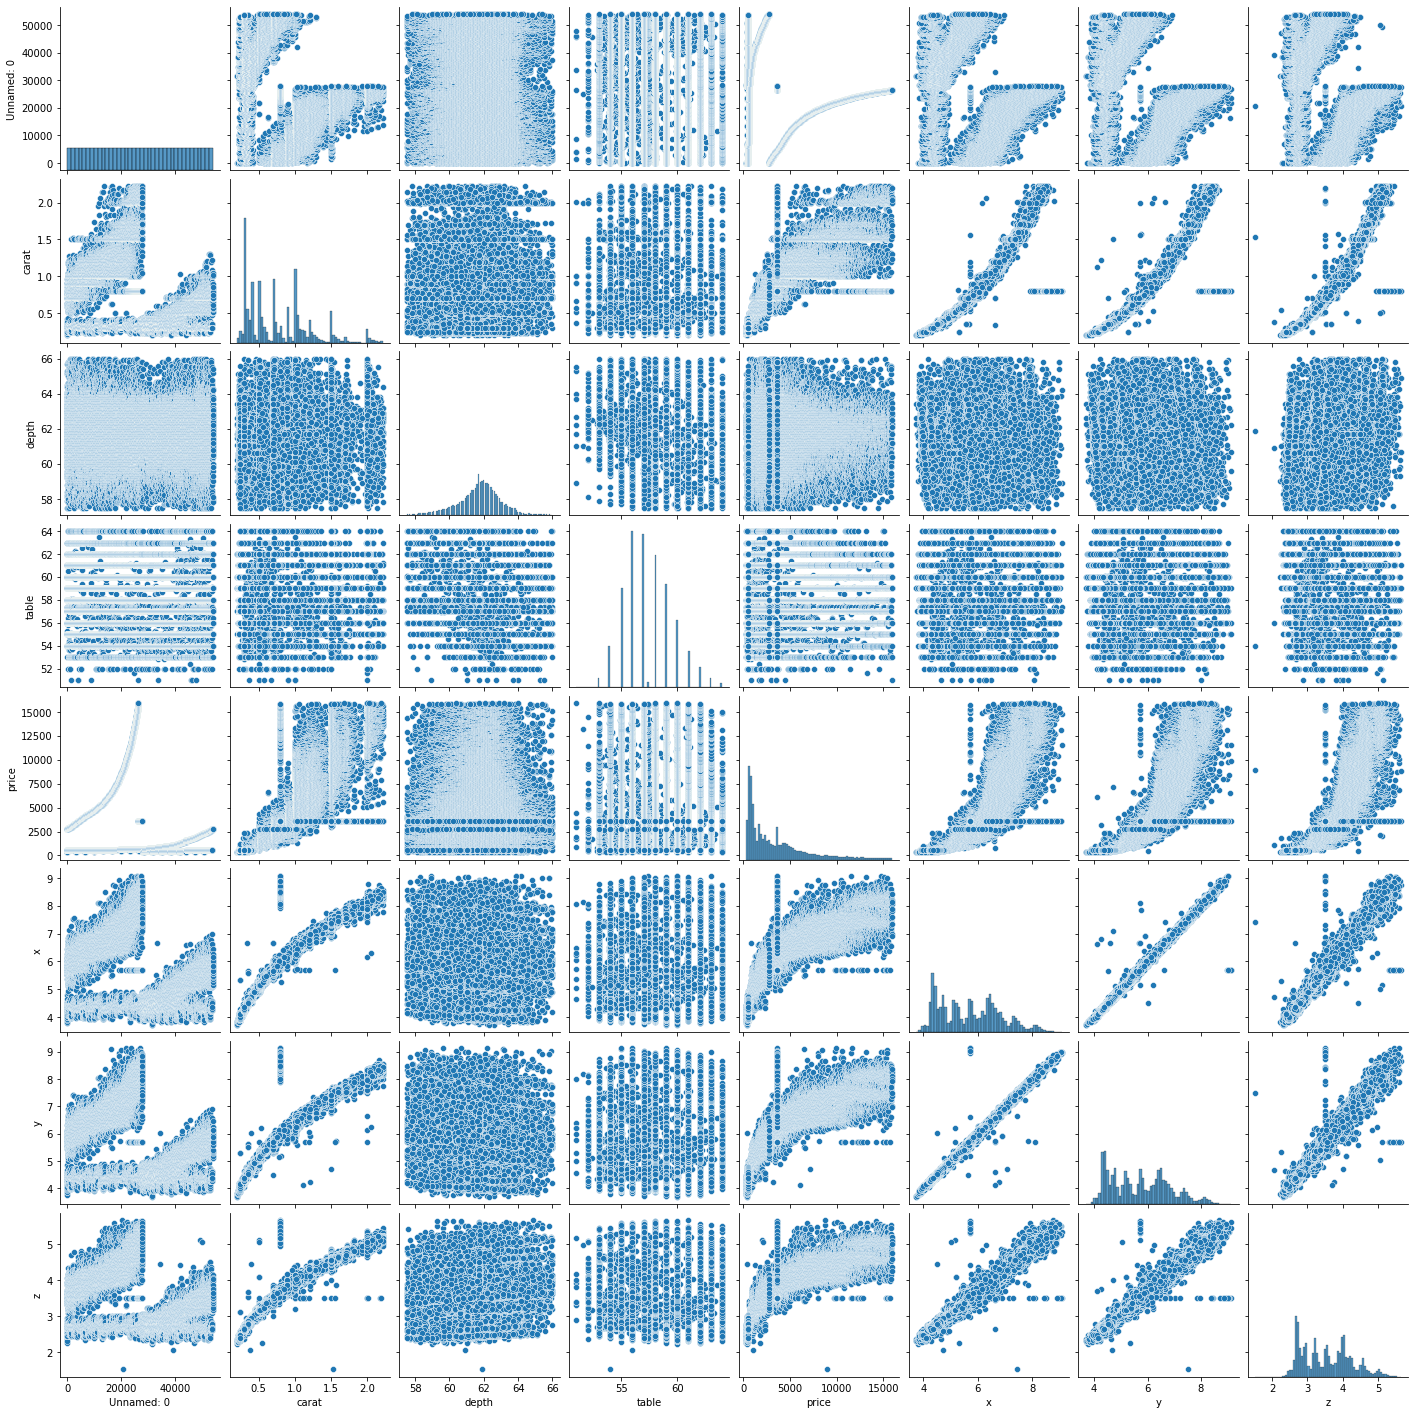

In [78]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)